# Practical Data Science With Python: Assessment 2 - Glass Identification

In [1]:
# Import all relevant libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Retrieval

In [2]:
# Import csv file containing data (was converted to csv format before writing code):
# csv file assumed to be in working directory
Glass_Data = pd.read_csv("glass.csv", sep = ",", decimal = ".", 
                         header = None, names = ["ID", "Refractive Index", "Na %", "Mg %", "Al %", "Si %", "K %", "Ca %", 
                                                 "Ba %", "Fe %", "Type of Glass"])

In [3]:
# Check that Glass_Data matches the csv file:
Glass_Data.head(5)

,ID,Refractive Index,Na %,Mg %,Al %,Si %,K %,Ca %,Ba %,Fe %,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Note that the following capabilities to subscript text in Markdown Jupyter Notebook was applied using the following reference:
https://stackoverflow.com/questions/46011785/how-to-do-superscripts-and-subscripts-in-jupyter-notebook

When training a suitable model for classification of glass type, the input will be the columns pertaining to the refractive indices and oxide contents of each row. The output will be a classification given by the type of glass ranging from values 1 to 7 in the Type of Glass column. These values carry the meanings: 

1: Normal window glass 

2: Float processed window glass 

3: Normal vehicle glass 

4: Float processed vehicle glass

5: Container glass

6: Tableware glass

7: Headlamps glass

The refractive index is a measure of how a ray of incident lights bend through the glass sample. Each listed element column specifies the total weight percentage of oxides formed on the surface of the glass. These oxides are formed with Sodium (Na), Magnesium (Mg), Aluminium (Al), Silicon (Si), Potassium (K), Calcium (Ca), Barium (Ba), and Iron (Fe) as Na<sub>2</sub>O, MgO, Al<sub>2</sub>O<sub>3</sub>, SiO<sub>2</sub>, K<sub>2</sub>O, CaO, BaO, and Fe<sub>2</sub>O<sub>3</sub> respectively. The proportions of oxides formed and the refractive index of the glass are used to determine what type is identified. Glass is used for a wide range of purposes, and depending on the purpose they will have different compositions to fulfill their functions.

But before any modelling and visualisation are done, need to be sure that the data is of good quality.

# Data Preparation

In [4]:
# Firstly, check dimensions of data: 214 rows and 11 columns
Glass_Data.shape

(214, 11)

In [5]:
# Check data types of each column (and also their names):
Glass_Data.dtypes

ID                    int64
Refractive Index    float64
Na %                float64
Mg %                float64
Al %                float64
Si %                float64
K %                 float64
Ca %                float64
Ba %                float64
Fe %                float64
Type of Glass         int64
dtype: object

In [6]:
# Check for outliers and missing values in each column by applying masks:

# ID column: (Don't need to check for other data types because already specified to only use integers)

# Find IDs less than 1:
ID_Min_Mask = Glass_Data["ID"] < 1
print(Glass_Data[ID_Min_Mask == True]) # Empty
# Find IDs greater than 214:
ID_Max_Mask = Glass_Data["ID"] > Glass_Data.shape[0]
print(Glass_Data[ID_Max_Mask == True]) # Empty
# Find any duplicate IDs:
Unique_ID_List = Glass_Data["ID"].value_counts() > 1 # Finding IDs that appear more than once with a boolean list
print(Unique_ID_List.value_counts()) # Count how many are IDs are unique (False) and duplicated (True), none are duplicated
# Check for missing values:
ID_NA_Mask = Glass_Data["ID"].isnull()
print(Glass_Data[ID_NA_Mask == True]) # Empty
# All data seems clean for this column

Empty DataFrame
Columns: [ID, Refractive Index, Na %, Mg %, Al %, Si %, K %, Ca %, Ba %, Fe %, Type of Glass]
Index: []
Empty DataFrame
Columns: [ID, Refractive Index, Na %, Mg %, Al %, Si %, K %, Ca %, Ba %, Fe %, Type of Glass]
Index: []
False    214
Name: ID, dtype: int64
Empty DataFrame
Columns: [ID, Refractive Index, Na %, Mg %, Al %, Si %, K %, Ca %, Ba %, Fe %, Type of Glass]
Index: []


In [7]:
# Refractive Index column:

# Check for impossible values in refractive index column:
RI_Min_Mask = Glass_Data["Refractive Index"] <= 1 # Can't be 1 because then glass would behave as a vacuum
print(Glass_Data[RI_Min_Mask == True]) # Empty
# Check for missing values:
RI_NA_Mask = Glass_Data["Refractive Index"].isnull()
print(Glass_Data[RI_NA_Mask == True]) # Empty

Empty DataFrame
Columns: [ID, Refractive Index, Na %, Mg %, Al %, Si %, K %, Ca %, Ba %, Fe %, Type of Glass]
Index: []
Empty DataFrame
Columns: [ID, Refractive Index, Na %, Mg %, Al %, Si %, K %, Ca %, Ba %, Fe %, Type of Glass]
Index: []


In [8]:
# Oxide Columns:

# Check for impossible values and missing values in each oxide column
# Also check that sum of all columns per row = 100%, allow for rounding errors up to +/-1% of 100%
for Row in range(0, 214):
    Percent_Sum = 0
    for Col in range(2, 10):
        Percent_Sum += Glass_Data.iloc[Row, Col]
        if Glass_Data.iloc[Row, Col] == np.nan:
            print(Row, Col)
        if Glass_Data.iloc[Row, Col] < 0:
            print(Row, Col)
        elif Glass_Data.iloc[Row, Col] > 100:
            print(Row, Col)
    if Percent_Sum >= 101:
        print("Row {0} has incorrect proportions for oxide weights".format(Row))
    elif Percent_Sum <= 99:
        print("Row {0} has incorrect proportions for oxide weights".format(Row))

# No values get printed so no issues with data

In [9]:
# Check different labels in Type of Glass column:
Glass_Data["Type of Glass"].value_counts(dropna = False)

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of Glass, dtype: int64

In conclusion, all the data in the glass.csv file seems to have already been preprocessed as all data entries are viable, not missing, and use the correct data types. No values had to be replaced, and no observations needed to be removed. The data is ready for the exploration stage.

# Data Exploration

First begin by exploring the distribution of values in each column. ID column will be ignored since it is used for indexing.

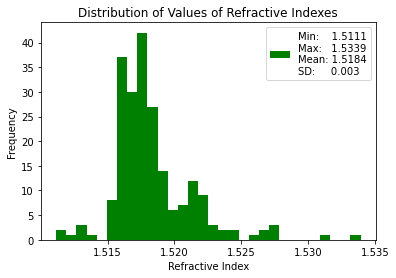

In [10]:
# Refractive Index:
Glass_Data['Refractive Index'].plot(kind = 'hist', bins = 30, color = 'green')
plt.xlabel("Refractive Index") # Note that the refractive index of a material does not have units of measurement
plt.title("Distribution of Values of Refractive Indexes")

Min = round(Glass_Data['Refractive Index'].min(), 4)
Max = round(Glass_Data['Refractive Index'].max(), 4)
Mean = round(Glass_Data['Refractive Index'].mean(), 4)
SD = round(Glass_Data['Refractive Index'].std(), 4)
plt.legend(["Min:    {0}\nMax:   {1}\nMean: {2}\nSD:     {3}".format(Min, Max, Mean, SD)])

plt.show()

Note that the following capabilities to subscript text for printing in Jupyter Notebook was applied using the following reference:
https://stackoverflow.com/questions/24391892/printing-subscript-in-python

Note that the following capabilities to create and edit a legend was applied using the following reference:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

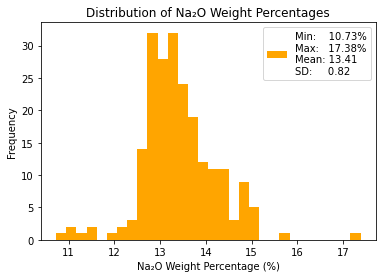

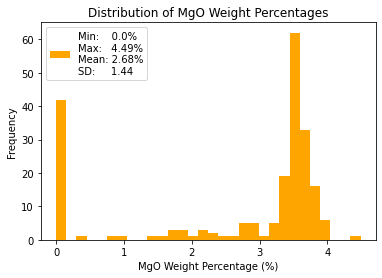

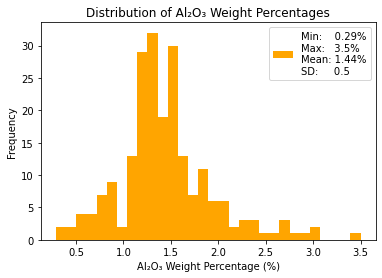

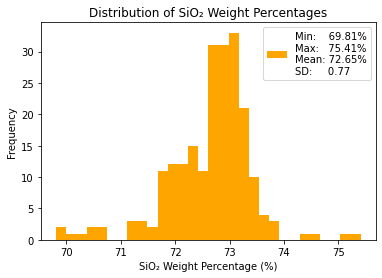

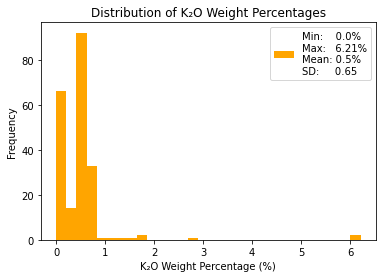

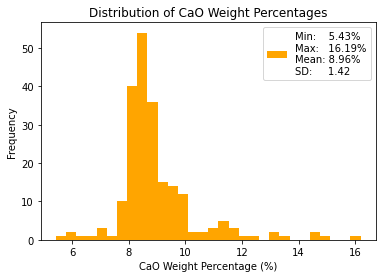

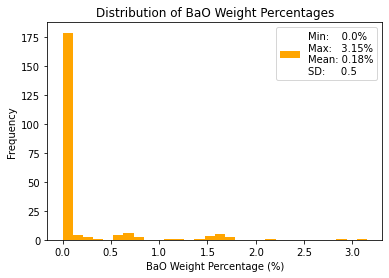

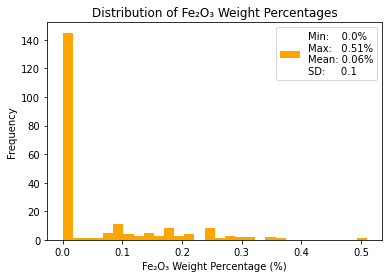

In [11]:
# Oxide Weight Percentages:

# Na:
Glass_Data['Na %'].plot(kind = 'hist', bins = 30, color = 'orange')
plt.xlabel(u"Na\u2082O Weight Percentage (%)")
plt.title(u"Distribution of Na\u2082O Weight Percentages")

Min = round(Glass_Data['Na %'].min(), 2)
Max = round(Glass_Data['Na %'].max(), 2)
Mean =round(Glass_Data['Na %'].mean(), 2)
SD = round(Glass_Data['Na %'].std(), 2)
plt.legend(["Min:    {0}%\nMax:   {1}%\nMean: {2}\nSD:     {3}".format(Min, Max, Mean, SD)])

plt.show()

# Mg:
Glass_Data['Mg %'].plot(kind = 'hist', bins = 30, color = 'orange')
plt.xlabel("MgO Weight Percentage (%)")
plt.title("Distribution of MgO Weight Percentages")

Min = round(Glass_Data['Mg %'].min(), 2)
Max = round(Glass_Data['Mg %'].max(), 2)
Mean =round(Glass_Data['Mg %'].mean(), 2)
SD = round(Glass_Data['Mg %'].std(), 2)
plt.legend(["Min:    {0}%\nMax:   {1}%\nMean: {2}%\nSD:     {3}".format(Min, Max, Mean, SD)])

plt.show()

# Al:
Glass_Data['Al %'].plot(kind = 'hist', bins = 30, color = 'orange')
plt.xlabel(u"Al\u2082O\u2083 Weight Percentage (%)")
plt.title(u"Distribution of Al\u2082O\u2083 Weight Percentages")

Min = round(Glass_Data['Al %'].min(), 2)
Max = round(Glass_Data['Al %'].max(), 2)
Mean =round(Glass_Data['Al %'].mean(), 2)
SD = round(Glass_Data['Al %'].std(), 2)
plt.legend(["Min:    {0}%\nMax:   {1}%\nMean: {2}%\nSD:     {3}".format(Min, Max, Mean, SD)])

plt.show()

# Si:
Glass_Data['Si %'].plot(kind = 'hist', bins = 30, color = 'orange')
plt.xlabel(u"SiO\u2082 Weight Percentage (%)")
plt.title(u"Distribution of SiO\u2082 Weight Percentages")

Min = round(Glass_Data['Si %'].min(), 2)
Max = round(Glass_Data['Si %'].max(), 2)
Mean =round(Glass_Data['Si %'].mean(), 2)
SD = round(Glass_Data['Si %'].std(), 2)
plt.legend(["Min:    {0}%\nMax:   {1}%\nMean: {2}%\nSD:     {3}".format(Min, Max, Mean, SD)])

plt.show()

# K:
Glass_Data['K %'].plot(kind = 'hist', bins = 30, color = 'orange')
plt.xlabel(u"K\u2082O Weight Percentage (%)")
plt.title(u"Distribution of K\u2082O Weight Percentages")

Min = round(Glass_Data['K %'].min(), 2)
Max = round(Glass_Data['K %'].max(), 2)
Mean =round(Glass_Data['K %'].mean(), 2)
SD = round(Glass_Data['K %'].std(), 2)
plt.legend(["Min:    {0}%\nMax:   {1}%\nMean: {2}%\nSD:     {3}".format(Min, Max, Mean, SD)])

plt.show()

# Ca:
Glass_Data['Ca %'].plot(kind = 'hist', bins = 30, color = 'orange')
plt.xlabel("CaO Weight Percentage (%)")
plt.title("Distribution of CaO Weight Percentages")

Min = round(Glass_Data['Ca %'].min(), 2)
Max = round(Glass_Data['Ca %'].max(), 2)
Mean =round(Glass_Data['Ca %'].mean(), 2)
SD = round(Glass_Data['Ca %'].std(), 2)
plt.legend(["Min:    {0}%\nMax:   {1}%\nMean: {2}%\nSD:     {3}".format(Min, Max, Mean, SD)])

plt.show()

# Ba:
Glass_Data['Ba %'].plot(kind = 'hist', bins = 30, color = 'orange')
plt.xlabel(u"BaO Weight Percentage (%)")
plt.title("Distribution of BaO Weight Percentages")

Min = round(Glass_Data['Ba %'].min(), 2)
Max = round(Glass_Data['Ba %'].max(), 2)
Mean =round(Glass_Data['Ba %'].mean(), 2)
SD = round(Glass_Data['Ba %'].std(), 2)
plt.legend(["Min:    {0}%\nMax:   {1}%\nMean: {2}%\nSD:     {3}".format(Min, Max, Mean, SD)])

plt.show()

# Fe:
Glass_Data['Fe %'].plot(kind = 'hist', bins = 30, color = 'orange')
plt.xlabel(u"Fe\u2082O\u2083 Weight Percentage (%)")
plt.title(u"Distribution of Fe\u2082O\u2083 Weight Percentages")

Min = round(Glass_Data['Fe %'].min(), 2)
Max = round(Glass_Data['Fe %'].max(), 2)
Mean =round(Glass_Data['Fe %'].mean(), 2)
SD = round(Glass_Data['Fe %'].std(), 2)
plt.legend(["Min:    {0}%\nMax:   {1}%\nMean: {2}%\nSD:     {3}".format(Min, Max, Mean, SD)])

plt.show()

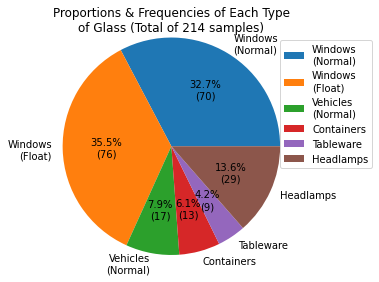

In [12]:
# Type of glass:
# Want to generate a pie chart showing frequencies of each type of glass:
Type_Freqs = Glass_Data['Type of Glass'].value_counts() # Get type of glass and frequencies of each type
Type_Freqs = Type_Freqs.sort_index(ascending = True) # Sort by type value
Total_Samples = Type_Freqs.sum() # Count all samples
Labels = ['Windows\n(Normal)', 'Windows\n(Float)', 'Vehicles\n(Normal)', 'Containers', 'Tableware', 'Headlamps']

Type_Freqs.plot(kind = 'pie', labels = Labels,
                autopct = lambda Prop : '{:.1f}%\n({:})'.format(Prop, round(Prop*Type_Freqs.sum()/100)),
               radius = 1.25)
plt.title(f"Proportions & Frequencies of Each Type\nof Glass (Total of {Total_Samples} samples)")
plt.ylabel('')
plt.legend(labels = Labels, loc = (1.0,0.4))
plt.show()

Because there are seven different glassware classifications, it would be useful to observe their general properties per classification and test if the oxide content of each glass differs by the type of glass. This can be accomplished by generating box plots showing the distributions of weight percentages of each oxide for each glass type. There are two approaches to doing this: each graph shows percentages of every oxide for one glass type simultaneously, or each graph shows only one oxide type but for every glass type simultanoeusly. The second approach was taken as the weight percentages of each oxide can be more easily distinguished between different glass types. Two examples of the first approach are taken for window glass (normal and float-processed) to show why it is not helpful. 

The null hypothesis to be tested is that each feature is independent of the target variable. If the null hypothesis were true, then the distribution of values for every variable would not change with respect to the glass type. It is therefore sufficient to show that at least two different glass types carry differing distributions for a shared variable that cannot be a result of random error in sampling to reject the null hypothesis for that variable.

In [13]:
# Mask Generation
Window_Norm = Glass_Data["Type of Glass"] == 1
Window_Float = Glass_Data["Type of Glass"] == 2
Vehicle_Norm = Glass_Data["Type of Glass"] == 3
# No Vehicle glass generated with the float process in this data set
Containers = Glass_Data["Type of Glass"] == 5
Tableware = Glass_Data["Type of Glass"] == 6
Headlamps = Glass_Data["Type of Glass"] == 7

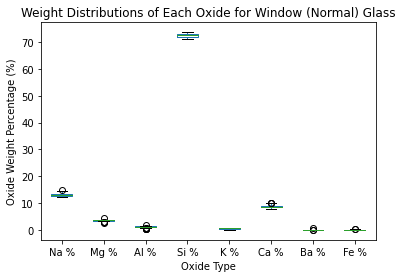

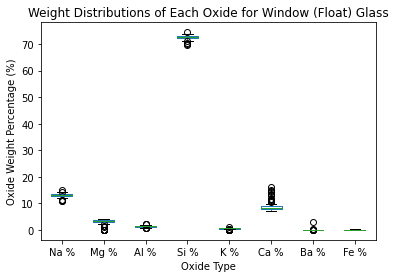

In [14]:
# Windows (Normal)
Window_Norm_Oxide_Subset = Glass_Data[Window_Norm == True][['Na %', 'Mg %', 'Al %', 'Si %', 'K %', 'Ca %', 'Ba %', 'Fe %']]

Window_Norm_Oxide_Subset.plot(kind = 'box')
plt.title("Weight Distributions of Each Oxide for Window (Normal) Glass")
plt.xlabel("Oxide Type")
plt.ylabel("Oxide Weight Percentage (%)")
plt.show()

# Windows (Float)
Window_Float_Oxide_Subset = Glass_Data[Window_Float == True][['Na %', 'Mg %', 'Al %', 'Si %', 'K %', 'Ca %', 'Ba %', 'Fe %']]
Window_Float_Refract_Subset = Glass_Data[Window_Float == True]['Refractive Index']

Window_Float_Oxide_Subset.plot(kind = 'box')
plt.title("Weight Distributions of Each Oxide for Window (Float) Glass")
plt.xlabel("Oxide Type")
plt.ylabel("Oxide Weight Percentage (%)")
plt.show()

As shown above, the two graphs for normal and float-processed windows are very hard to distinguish, and differences cannot be reliably estimated due to the small size of each range described by the box plots. The following graphs will apply the second approach instead.

In [15]:
# Collect the data entries for each oxide type and split into different categories based on the corresponding glass types.

# Window (Normal) Glass
Window_Norm_Na = Glass_Data[Window_Norm == True]['Na %']
Window_Norm_Mg = Glass_Data[Window_Norm == True]['Mg %']
Window_Norm_Al = Glass_Data[Window_Norm == True]['Al %']
Window_Norm_Si = Glass_Data[Window_Norm == True]['Si %']
Window_Norm_K = Glass_Data[Window_Norm == True]['K %']
Window_Norm_Ca = Glass_Data[Window_Norm == True]['Ca %']
Window_Norm_Ba = Glass_Data[Window_Norm == True]['Ba %']
Window_Norm_Fe = Glass_Data[Window_Norm == True]['Fe %']
# Window (Float) Glass
Window_Float_Na = Glass_Data[Window_Float == True]['Na %']
Window_Float_Mg = Glass_Data[Window_Float == True]['Mg %']
Window_Float_Al = Glass_Data[Window_Float == True]['Al %']
Window_Float_Si = Glass_Data[Window_Float == True]['Si %']
Window_Float_K = Glass_Data[Window_Float == True]['K %']
Window_Float_Ca = Glass_Data[Window_Float == True]['Ca %']
Window_Float_Ba = Glass_Data[Window_Float == True]['Ba %']
Window_Float_Fe = Glass_Data[Window_Float == True]['Fe %']
# Vehicle (Normal) Glass
Vehicle_Norm_Na = Glass_Data[Vehicle_Norm == True]['Na %']
Vehicle_Norm_Mg = Glass_Data[Vehicle_Norm == True]['Mg %']
Vehicle_Norm_Al = Glass_Data[Vehicle_Norm == True]['Al %']
Vehicle_Norm_Si = Glass_Data[Vehicle_Norm == True]['Si %']
Vehicle_Norm_K = Glass_Data[Vehicle_Norm == True]['K %']
Vehicle_Norm_Ca = Glass_Data[Vehicle_Norm == True]['Ca %']
Vehicle_Norm_Ba = Glass_Data[Vehicle_Norm == True]['Ba %']
Vehicle_Norm_Fe = Glass_Data[Vehicle_Norm == True]['Fe %']
# Container Glass
Containers_Na = Glass_Data[Containers == True]['Na %']
Containers_Mg = Glass_Data[Containers == True]['Mg %']
Containers_Al = Glass_Data[Containers == True]['Al %']
Containers_Si = Glass_Data[Containers == True]['Si %']
Containers_K = Glass_Data[Containers == True]['K %']
Containers_Ca = Glass_Data[Containers == True]['Ca %']
Containers_Ba = Glass_Data[Containers == True]['Ba %']
Containers_Fe = Glass_Data[Containers == True]['Fe %']
# Tableware Glass
Tableware_Na = Glass_Data[Tableware == True]['Na %']
Tableware_Mg = Glass_Data[Tableware == True]['Mg %']
Tableware_Al = Glass_Data[Tableware == True]['Al %']
Tableware_Si = Glass_Data[Tableware == True]['Si %']
Tableware_K = Glass_Data[Tableware == True]['K %']
Tableware_Ca = Glass_Data[Tableware == True]['Ca %']
Tableware_Ba = Glass_Data[Tableware == True]['Ba %']
Tableware_Fe = Glass_Data[Tableware == True]['Fe %']
# Headlamps Glass
Headlamps_Na = Glass_Data[Headlamps == True]['Na %']
Headlamps_Mg = Glass_Data[Headlamps == True]['Mg %']
Headlamps_Al = Glass_Data[Headlamps == True]['Al %']
Headlamps_Si = Glass_Data[Headlamps == True]['Si %']
Headlamps_K = Glass_Data[Headlamps == True]['K %']
Headlamps_Ca = Glass_Data[Headlamps == True]['Ca %']
Headlamps_Ba = Glass_Data[Headlamps == True]['Ba %']
Headlamps_Fe = Glass_Data[Headlamps == True]['Fe %']

Null hypothesis: The percentages of sodium oxide is not influenced by the type of glass.


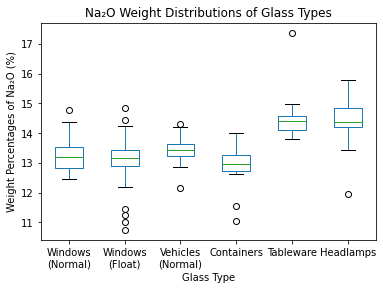

Null hypothesis: The percentages of magnesium oxide is not influenced by the type of glass.


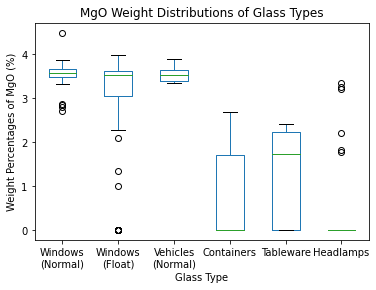

Null hypothesis: The percentages of aluminium oxide is not influenced by the type of glass.


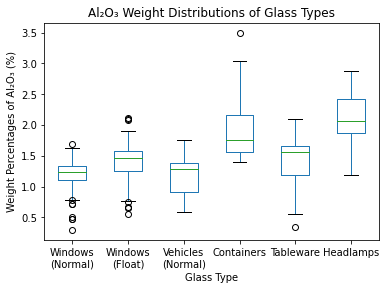

Null hypothesis: The percentages of silicon oxide is not influenced by the type of glass.


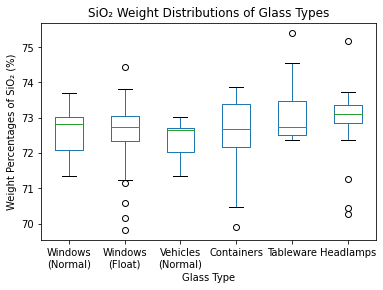

Null hypothesis: The percentages of potassium oxide is not influenced by the type of glass.


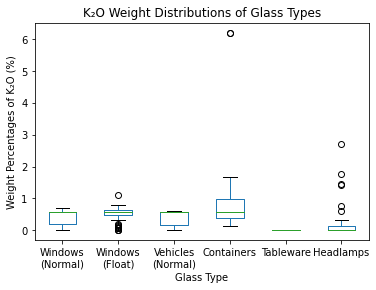

Null hypothesis: The percentages of calcium oxide is not influenced by the type of glass.


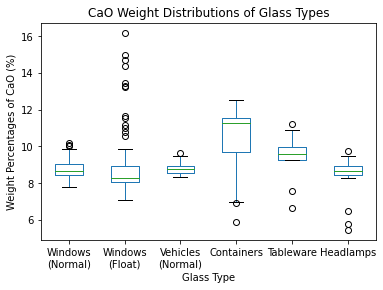

Null hypothesis: The percentages of barium oxide is not influenced by the type of glass.


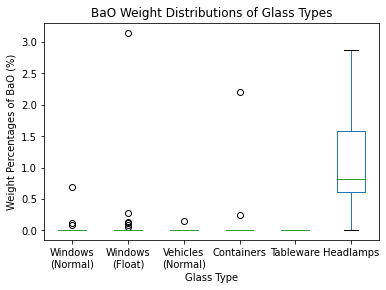

Null hypothesis: The percentages of iron oxide is not influenced by the type of glass.


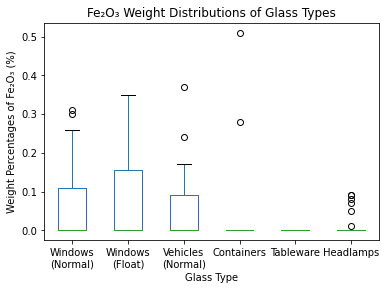

In [16]:
# Sodium Box Plot
print("Null hypothesis: The percentages of sodium oxide is not influenced by the type of glass.")
Na_Data = pd.DataFrame({'Windows\n(Normal)': Window_Norm_Na, 'Windows\n(Float)': Window_Float_Na, 
                        'Vehicles\n(Normal)': Vehicle_Norm_Na, 'Containers': Containers_Na, 'Tableware': Tableware_Na, 
                        'Headlamps': Headlamps_Na})
Na_Data.plot(kind = 'box')
plt.title(u"Na\u2082O Weight Distributions of Glass Types")
plt.xlabel("Glass Type")
plt.ylabel(u"Weight Percentages of Na\u2082O (%)")
plt.show()

# Magnesium Box Plot
print("Null hypothesis: The percentages of magnesium oxide is not influenced by the type of glass.")
Mg_Data = pd.DataFrame({'Windows\n(Normal)': Window_Norm_Mg, 'Windows\n(Float)': Window_Float_Mg, 
                        'Vehicles\n(Normal)': Vehicle_Norm_Mg, 'Containers': Containers_Mg, 'Tableware': Tableware_Mg, 
                        'Headlamps': Headlamps_Mg})
Mg_Data.plot(kind = 'box')
plt.title(u"MgO Weight Distributions of Glass Types")
plt.xlabel("Glass Type")
plt.ylabel(u"Weight Percentages of MgO (%)")
plt.show()

# Aluminium Box Plot
print("Null hypothesis: The percentages of aluminium oxide is not influenced by the type of glass.")
Al_Data = pd.DataFrame({'Windows\n(Normal)': Window_Norm_Al, 'Windows\n(Float)': Window_Float_Al, 
                        'Vehicles\n(Normal)': Vehicle_Norm_Al, 'Containers': Containers_Al, 'Tableware': Tableware_Al, 
                        'Headlamps': Headlamps_Al})
Al_Data.plot(kind = 'box')
plt.title(u"Al\u2082O\u2083 Weight Distributions of Glass Types")
plt.xlabel("Glass Type")
plt.ylabel(u"Weight Percentages of Al\u2082O\u2083 (%)")
plt.show()

# Silicon Box Plot
print("Null hypothesis: The percentages of silicon oxide is not influenced by the type of glass.")
Si_Data = pd.DataFrame({'Windows\n(Normal)': Window_Norm_Si, 'Windows\n(Float)': Window_Float_Si, 
                        'Vehicles\n(Normal)': Vehicle_Norm_Si, 'Containers': Containers_Si, 'Tableware': Tableware_Si, 
                        'Headlamps': Headlamps_Si})
Si_Data.plot(kind = 'box')
plt.title(u"SiO\u2082 Weight Distributions of Glass Types")
plt.xlabel("Glass Type")
plt.ylabel(u"Weight Percentages of SiO\u2082 (%)")
plt.show()

# Potassium Box Plot
print("Null hypothesis: The percentages of potassium oxide is not influenced by the type of glass.")
K_Data = pd.DataFrame({'Windows\n(Normal)': Window_Norm_K, 'Windows\n(Float)': Window_Float_K, 
                       'Vehicles\n(Normal)': Vehicle_Norm_K, 'Containers': Containers_K, 'Tableware': Tableware_K, 
                       'Headlamps': Headlamps_K})
K_Data.plot(kind = 'box')
plt.title(u"K\u2082O Weight Distributions of Glass Types")
plt.xlabel("Glass Type")
plt.ylabel(u"Weight Percentages of K\u2082O (%)")
plt.show()

# Calcium Box Plot
print("Null hypothesis: The percentages of calcium oxide is not influenced by the type of glass.")
Ca_Data = pd.DataFrame({'Windows\n(Normal)': Window_Norm_Ca, 'Windows\n(Float)': Window_Float_Ca, 
                        'Vehicles\n(Normal)': Vehicle_Norm_Ca, 'Containers': Containers_Ca, 'Tableware': Tableware_Ca, 
                        'Headlamps': Headlamps_Ca})
Ca_Data.plot(kind = 'box')
plt.title(u"CaO Weight Distributions of Glass Types")
plt.xlabel("Glass Type")
plt.ylabel(u"Weight Percentages of CaO (%)")
plt.show()

# Barium Box Plot
print("Null hypothesis: The percentages of barium oxide is not influenced by the type of glass.")
Ba_Data = pd.DataFrame({'Windows\n(Normal)': Window_Norm_Ba, 'Windows\n(Float)': Window_Float_Ba, 
                        'Vehicles\n(Normal)': Vehicle_Norm_Ba, 'Containers': Containers_Ba, 'Tableware': Tableware_Ba, 
                        'Headlamps': Headlamps_Ba})
Ba_Data.plot(kind = 'box')
plt.title(u"BaO Weight Distributions of Glass Types")
plt.xlabel("Glass Type")
plt.ylabel(u"Weight Percentages of BaO (%)")
plt.show()

# Iron Box Plot
print("Null hypothesis: The percentages of iron oxide is not influenced by the type of glass.")
Fe_Data = pd.DataFrame({'Windows\n(Normal)': Window_Norm_Fe, 'Windows\n(Float)': Window_Float_Fe, 
                        'Vehicles\n(Normal)': Vehicle_Norm_Fe, 'Containers': Containers_Fe, 'Tableware': Tableware_Fe, 
                        'Headlamps': Headlamps_Fe})
Fe_Data.plot(kind = 'box')
plt.title(u"Fe\u2082O\u2083 Weight Distributions of Glass Types")
plt.xlabel("Glass Type")
plt.ylabel(u"Weight Percentages of Fe\u2082O\u2083 (%)")
plt.show()

With all the oxide plots finished, it is now time to measure how the refractive index of glass differs by glass type. A new null hypothesis similar to the previous ones is to be tested.

Null hypothesis: The refractive index of a glass sample is not influenced by the type of glass.


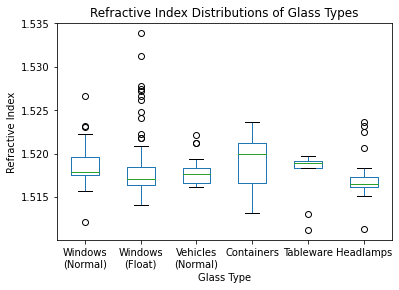

In [17]:
# Refractive Index Box Plot
print("Null hypothesis: The refractive index of a glass sample is not influenced by the type of glass.")
Window_Norm_RI = Glass_Data[Window_Norm == True]['Refractive Index']
Window_Float_RI = Glass_Data[Window_Float == True]['Refractive Index']
Vehicle_Norm_RI = Glass_Data[Vehicle_Norm == True]['Refractive Index']
Containers_RI = Glass_Data[Containers == True]['Refractive Index']
Tableware_RI = Glass_Data[Tableware == True]['Refractive Index']
Headlamps_RI = Glass_Data[Headlamps == True]['Refractive Index']

Refract_Data = pd.DataFrame({'Windows\n(Normal)': Window_Norm_RI, 'Windows\n(Float)': Window_Float_RI, 
                             'Vehicles\n(Normal)': Vehicle_Norm_RI, 'Containers': Containers_RI, 'Tableware': Tableware_RI, 
                             'Headlamps': Headlamps_RI})
Refract_Data.plot(kind = 'box')
plt.title("Refractive Index Distributions of Glass Types")
plt.xlabel("Glass Type")
plt.ylabel("Refractive Index")
plt.show()

One may notice the shapes of the box plots for refractive indexes are very similar to that of the Calcium Oxide box plots. Worthwhile to create scatter plots connecting oxide percentages to refractive indexes to see if there is a correlation between them. The new null hypothesis to be addressed is: the refractive index of a glass sample is independent of the oxide contents of the glass. The null hypothesis can be reasonably rejected if a correlation can be identified between the two features using a scatter plot. 

Note that the following capabilities to plot a line of regression in scatter plots was applied using the following reference:
https://stackoverflow.com/questions/37234163/how-to-add-a-line-of-best-fit-to-scatter-plot

Null hypothesis: there is no correlation between the levels of sodium oxide and the refractive index of the glass.


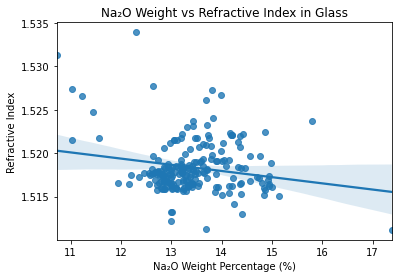

Null hypothesis: there is no correlation between the levels of magnesium oxide and the refractive index of the glass.


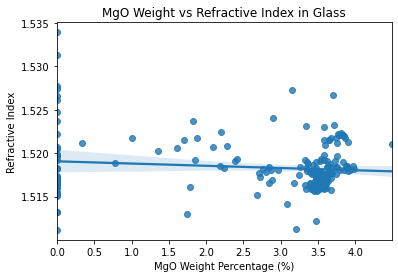

Null hypothesis: there is no correlation between the levels of aluminium oxide and the refractive index of the glass.


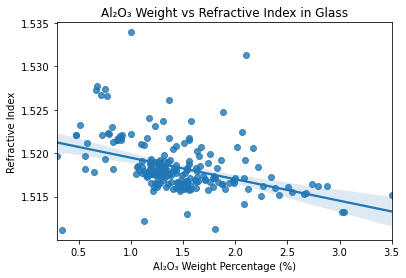

Null hypothesis: there is no correlation between the levels of silicon oxide and the refractive index of the glass.


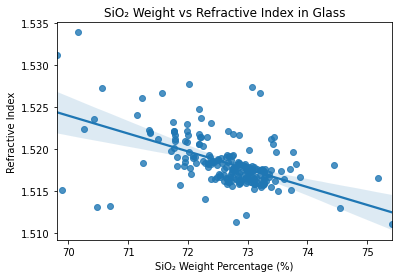

Null hypothesis: there is no correlation between the levels of potassium oxide and the refractive index of the glass.


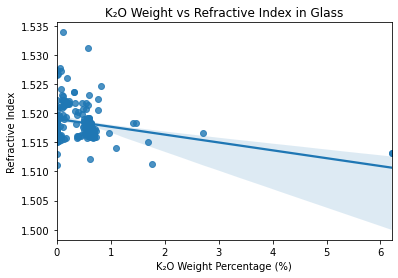

Null hypothesis: there is no correlation between the levels of calcium oxide and the refractive index of the glass.


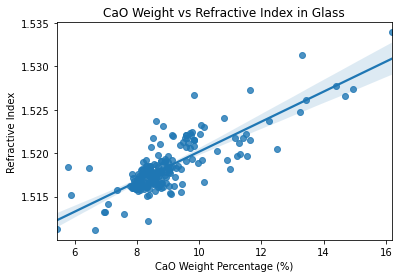

Null hypothesis: there is no correlation between the levels of barium oxide and the refractive index of the glass.


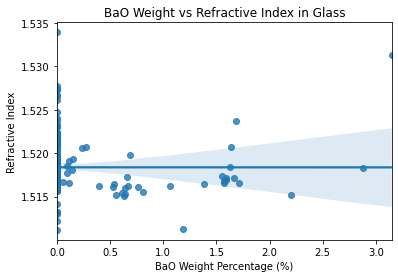

Null hypothesis: there is no correlation between the levels of iron oxide and the refractive index of the glass.


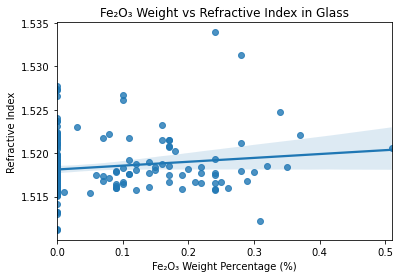

In [18]:
# Generate scatter plots to show potential correlation between oxide weight percentages (x-axis) and refractive indexes (y-axis)
# Use seaborn to show lines of regression in plot with confidence intervals

# Na
print("Null hypothesis: there is no correlation between the levels of sodium oxide and the refractive index of the glass.")
sns.regplot(data = Glass_Data, x = "Na %", y = "Refractive Index")
plt.xlabel(u"Na\u2082O Weight Percentage (%)")
plt.title(u"Na\u2082O Weight vs Refractive Index in Glass")
plt.show()
# Mg
print("Null hypothesis: there is no correlation between the levels of magnesium oxide and the refractive index of the glass.")
sns.regplot(data = Glass_Data, x = "Mg %", y = "Refractive Index")
plt.xlabel("MgO Weight Percentage (%)")
plt.title(u"MgO Weight vs Refractive Index in Glass")
plt.show()
# Al
print("Null hypothesis: there is no correlation between the levels of aluminium oxide and the refractive index of the glass.")
sns.regplot(data = Glass_Data, x = "Al %", y = "Refractive Index")
plt.xlabel(u"Al\u2082O\u2083 Weight Percentage (%)")
plt.title(u"Al\u2082O\u2083 Weight vs Refractive Index in Glass")
plt.show()
# Si
print("Null hypothesis: there is no correlation between the levels of silicon oxide and the refractive index of the glass.")
sns.regplot(data = Glass_Data, x = "Si %", y = "Refractive Index")
plt.xlabel(u"SiO\u2082 Weight Percentage (%)")
plt.title(u"SiO\u2082 Weight vs Refractive Index in Glass")
plt.show()
# K
print("Null hypothesis: there is no correlation between the levels of potassium oxide and the refractive index of the glass.")
sns.regplot(data = Glass_Data, x = "K %", y = "Refractive Index")
plt.xlabel(u"K\u2082O Weight Percentage (%)")
plt.title(u"K\u2082O Weight vs Refractive Index in Glass")
plt.show()
# Ca
print("Null hypothesis: there is no correlation between the levels of calcium oxide and the refractive index of the glass.")
sns.regplot(data = Glass_Data, x = "Ca %", y = "Refractive Index")
plt.xlabel("CaO Weight Percentage (%)")
plt.title(u"CaO Weight vs Refractive Index in Glass")
plt.show()
# Ba
print("Null hypothesis: there is no correlation between the levels of barium oxide and the refractive index of the glass.")
sns.regplot(data = Glass_Data, x = "Ba %", y = "Refractive Index")
plt.xlabel("BaO Weight Percentage (%)")
plt.title(u"BaO Weight vs Refractive Index in Glass")
plt.show()
# Fe
print("Null hypothesis: there is no correlation between the levels of iron oxide and the refractive index of the glass.")
sns.regplot(data = Glass_Data, x = "Fe %", y = "Refractive Index")
plt.xlabel(u"Fe\u2082O\u2083 Weight Percentage (%)")
plt.title(u"Fe\u2082O\u2083 Weight vs Refractive Index in Glass")
plt.show()

A final null hypothesis can be generated: the oxide percentages are independent of each other. The null hypothesis can be rejected for a pair of variables if a trend can be observed between them. 

array([[<AxesSubplot:xlabel='Na %', ylabel='Na %'>,
        <AxesSubplot:xlabel='Mg %', ylabel='Na %'>,
        <AxesSubplot:xlabel='Al %', ylabel='Na %'>,
        <AxesSubplot:xlabel='Si %', ylabel='Na %'>,
        <AxesSubplot:xlabel='K %', ylabel='Na %'>,
        <AxesSubplot:xlabel='Ca %', ylabel='Na %'>,
        <AxesSubplot:xlabel='Ba %', ylabel='Na %'>,
        <AxesSubplot:xlabel='Fe %', ylabel='Na %'>],
       [<AxesSubplot:xlabel='Na %', ylabel='Mg %'>,
        <AxesSubplot:xlabel='Mg %', ylabel='Mg %'>,
        <AxesSubplot:xlabel='Al %', ylabel='Mg %'>,
        <AxesSubplot:xlabel='Si %', ylabel='Mg %'>,
        <AxesSubplot:xlabel='K %', ylabel='Mg %'>,
        <AxesSubplot:xlabel='Ca %', ylabel='Mg %'>,
        <AxesSubplot:xlabel='Ba %', ylabel='Mg %'>,
        <AxesSubplot:xlabel='Fe %', ylabel='Mg %'>],
       [<AxesSubplot:xlabel='Na %', ylabel='Al %'>,
        <AxesSubplot:xlabel='Mg %', ylabel='Al %'>,
        <AxesSubplot:xlabel='Al %', ylabel='Al %'>,
        <Axe

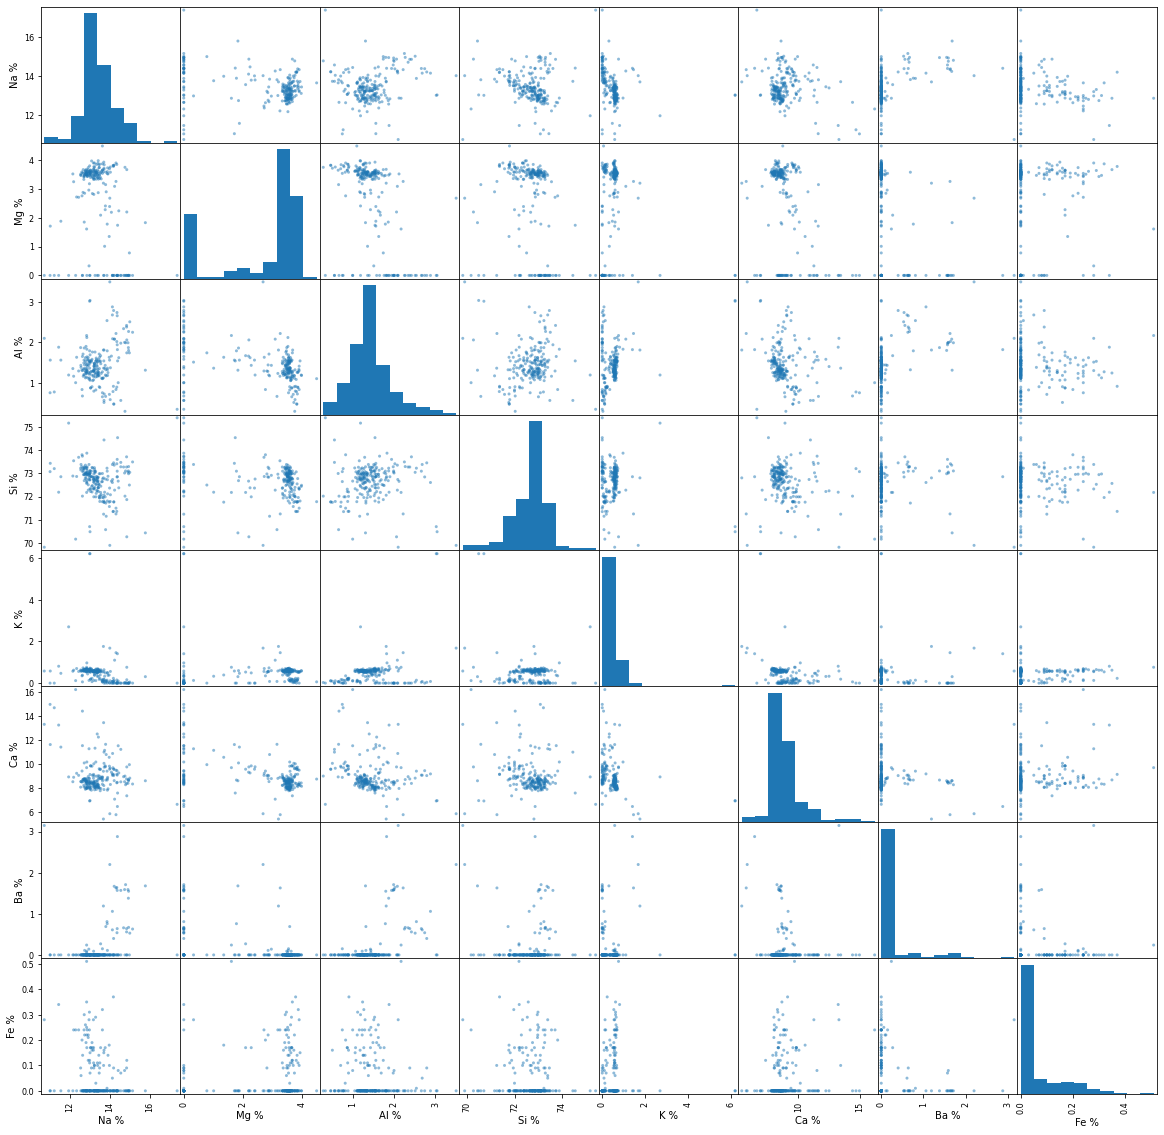

In [19]:
# Scatter Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(Glass_Data[['Na %', 'Mg %', 'Al %', 'Si %', 'K %', 'Ca %', 'Ba %', 'Fe %']], alpha = 0.5, 
               figsize = (20,20), diagonal = 'hist')

# Data Modelling: k-Nearest Neighbours

To perform the data modelling process, it is important to recall what the goal of this task is. Through measurements of properties of glass, the model aims to classify which type of glassware object each sample belongs to. This is a classification problem, and thus the first model to be explored is the k-Nearest Neighbours method.

To begin, it is worth noting that at the beginning stages the refractive index and oxide percentages all act as the features to be selected for modelling. These are all attributes that are assumed to be relevant and effective in the classification of glass. As the kNN model is explored, this assumption may change. The ID column is excluded as a feature because it is only used for indexing samples. The type of glass is excluded as a feature because it is the target variable.

Before any modelling is done however, need to define the data that will be used for training and testing all models:

In [20]:
# Preparing the data for modelling:
from sklearn.model_selection import train_test_split

# Define x (input) data for models: The refractive index and oxide percentages of a sample
Glass_Data_x = Glass_Data[['Refractive Index', 'Na %', 'Mg %', 'Al %', 'Si %', 'K %', 'Ca %', 'Ba %', 'Fe %']]

# Define y (output) data for models: The classification of the sample - Type of Glass
Glass_Data_y = Glass_Data['Type of Glass']

# Split samples into training and testing sets - Make test sample 40% (standard) of the total data:
x0_train, x0_test, y0_train, y0_test = train_test_split(Glass_Data_x, Glass_Data_y, test_size = 0.4, 
                                                        random_state = 1)

Now apply the data to a kNN classifier. Note the train and test variables are defined with an x0 and y0. This is because these will not be the final selection of test and training sets for reasons that will become apparent soon. The model will be evaluated using a confusion matrix and classification report for k values of 1 to 10.

In [21]:
# kNN Model 1: non-stratified, p = 2, weights = none
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Model_Scores = []
for k in range(1,11):
    # Model Training
    clf = KNeighborsClassifier(k, p = 2)
    clf.fit(x0_train, y0_train)
    y0_predicted = clf.predict(x0_test)
    print(f"##################################################################\nk value: {k}")
    # Model Evaluation
    Glass_CM = confusion_matrix(y0_test, y0_predicted)
    Glass_CR = classification_report(y0_test, y0_predicted)
    print(Glass_CM)
    print(Glass_CR)
    Model_Scores.append(round(clf.score(x0_test, y0_test), 2))

# Summary of results
print("k vs Accuracy\n   1    2    3     4     5    6     7     8    9    10")
print(Model_Scores)

##################################################################
k value: 1
[[23  5  5  0  0  0]
 [ 5 19  1  0  1  0]
 [ 5  1  2  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  1  0  0 12]]
              precision    recall  f1-score   support

           1       0.70      0.70      0.70        33
           2       0.76      0.73      0.75        26
           3       0.22      0.25      0.24         8
           5       1.00      1.00      1.00         4
           6       0.67      1.00      0.80         2
           7       1.00      0.92      0.96        13

    accuracy                           0.72        86
   macro avg       0.72      0.77      0.74        86
weighted avg       0.73      0.72      0.72        86

##################################################################
k value: 2
[[28  5  0  0  0  0]
 [ 6 19  0  0  1  0]
 [ 7  1  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 1  1  0  0  1 10]]
              precision    recall  f1-score   s

C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.

As shown above, the kNN models are a bit rough in performance. The accuracy values for each k are quite mediocre, the model should at least aim for 0.8 in accuracy. Only k = 1 features a weighted precision above 0.7! The abysmal values of precision and recall seem to occur most often for classifications 3 (Normal Vehicle Glass), 5 (Containers Glass), and 6 (Tableware Glass). The support column for each k value shows that these classifications only have 8, 4, and 2 test samples respectively.

However, consider that there is an option to stratify the data splitting so that the training/testing split is evenly distrubuted across different classes of data. This is important because the data features six separate classifications, and the sample sizes of each type is wildly uneven and disproportionate (vehicle glass currently has 8 test samples out of 17 samples total, so only 9 (52%) were used for training!). Stratification of data leads to each classification getting enough training samples to properly function in a testing environment. The cell below implements stratification into the training/testing split, and the cell after applies it to another kNN model.

In [22]:
# Splitting data parameters unchanged except for stratifying by glass classification:
x_train, x_test, y_train, y_test = train_test_split(Glass_Data_x, Glass_Data_y, test_size = 0.4, 
                                                        random_state = 1, stratify = Glass_Data_y)

In [23]:
# kNN Model 2: stratified, p = 2, weights = none

Model_Scores = []
for k in range(1,11):
    # Model Training
    clf = KNeighborsClassifier(k, p = 2)
    clf.fit(x_train, y_train)
    y_predicted = clf.predict(x_test)
    print(f"##################################################################\nk value: {k}")
    # Model Evaluation
    Glass_CM = confusion_matrix(y_test, y_predicted)
    Glass_CR = classification_report(y_test, y_predicted)
    print(Glass_CM)
    print(Glass_CR)
    Model_Scores.append(round(clf.score(x_test, y_test), 2))

# Summary of results
print("k vs Accuracy\n   1    2    3     4     5    6     7     8    9    10")
print(Model_Scores)

##################################################################
k value: 1
[[26  2  0  0  0  0]
 [ 7 20  2  0  1  0]
 [ 4  0  3  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  1  0  0  3  0]
 [ 0  0  1  0  1 10]]
              precision    recall  f1-score   support

           1       0.70      0.93      0.80        28
           2       0.87      0.67      0.75        30
           3       0.50      0.43      0.46         7
           5       1.00      1.00      1.00         5
           6       0.60      0.75      0.67         4
           7       1.00      0.83      0.91        12

    accuracy                           0.78        86
   macro avg       0.78      0.77      0.77        86
weighted avg       0.80      0.78      0.78        86

##################################################################
k value: 2
[[28  0  0  0  0  0]
 [ 8 21  1  0  0  0]
 [ 6  0  1  0  0  0]
 [ 0  2  0  3  0  0]
 [ 0  2  0  0  2  0]
 [ 1  0  0  0  2  9]]
              precision    recall  f1-score   s

C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.

With stratification, the recall of the models are improved for most values of k, most notably for k = 1 which rises from 0.72 to 0.78. The weighted precision rises from 0.73 to 0.80, a large improvement as well. Overall, it shows that stratification is the better principle for splitting the data, both theoretically and in practice. Stratification will be used for all models from now on.

The next three cells adjust the p parameter between 1 and 2. Distance based weighting is also tested to see if this improves the accuracy of the model.

In [24]:
# kNN Model 3: stratified, p = 2, weights = distance

Model_Scores = []
for k in range(1,11):
    # Model Training
    clf = KNeighborsClassifier(k, weights = 'distance', p = 2)
    clf.fit(x_train, y_train)
    y_predicted = clf.predict(x_test)
    print(f"##################################################################\nk value: {k}")
    # Model Evaluation
    Glass_CM = confusion_matrix(y_test, y_predicted)
    Glass_CR = classification_report(y_test, y_predicted)
    print(Glass_CM)
    print(Glass_CR)
    Model_Scores.append(round(clf.score(x_test, y_test), 2))

# Summary of results
print("k vs Accuracy\n   1    2    3     4     5    6     7     8    9    10")
print(Model_Scores)

##################################################################
k value: 1
[[26  2  0  0  0  0]
 [ 7 20  2  0  1  0]
 [ 4  0  3  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  1  0  0  3  0]
 [ 0  0  1  0  1 10]]
              precision    recall  f1-score   support

           1       0.70      0.93      0.80        28
           2       0.87      0.67      0.75        30
           3       0.50      0.43      0.46         7
           5       1.00      1.00      1.00         5
           6       0.60      0.75      0.67         4
           7       1.00      0.83      0.91        12

    accuracy                           0.78        86
   macro avg       0.78      0.77      0.77        86
weighted avg       0.80      0.78      0.78        86

##################################################################
k value: 2
[[26  2  0  0  0  0]
 [ 7 20  2  0  1  0]
 [ 4  0  3  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  1  0  0  3  0]
 [ 0  0  1  0  1 10]]
              precision    recall  f1-score   s

C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.

In [25]:
# kNN Model 4: stratified, p = 1, weights = none

Model_Scores = []
for k in range(1,11):
    # Model Training
    clf = KNeighborsClassifier(k, p = 1)
    clf.fit(x_train, y_train)
    y_predicted = clf.predict(x_test)
    print(f"##################################################################\nk value: {k}")
    # Model Evaluation
    Glass_CM = confusion_matrix(y_test, y_predicted)
    Glass_CR = classification_report(y_test, y_predicted)
    print(Glass_CM)
    print(Glass_CR)
    Model_Scores.append(round(clf.score(x_test, y_test), 2))

# Summary of results
print("k vs Accuracy\n   1    2     3     4     5     6     7     8     9    10")
print(Model_Scores)

##################################################################
k value: 1
[[28  0  0  0  0  0]
 [ 6 21  2  0  1  0]
 [ 4  0  3  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  1  0  0  3  0]
 [ 1  0  0  0  1 10]]
              precision    recall  f1-score   support

           1       0.72      1.00      0.84        28
           2       0.95      0.70      0.81        30
           3       0.60      0.43      0.50         7
           5       1.00      1.00      1.00         5
           6       0.60      0.75      0.67         4
           7       1.00      0.83      0.91        12

    accuracy                           0.81        86
   macro avg       0.81      0.79      0.79        86
weighted avg       0.84      0.81      0.81        86

##################################################################
k value: 2
[[28  0  0  0  0  0]
 [ 9 19  1  1  0  0]
 [ 7  0  0  0  0  0]
 [ 0  3  0  2  0  0]
 [ 0  1  0  0  3  0]
 [ 2  0  0  0  1  9]]
              precision    recall  f1-score   s

C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.

In [26]:
# kNN Model 5: stratified, p = 1, weights = distance

Model_Scores = []
for k in range(1,11):
    # Model Training
    clf = KNeighborsClassifier(k, weights = 'distance', p = 1)
    clf.fit(x_train, y_train)
    y_predicted = clf.predict(x_test)
    print(f"##################################################################\nk value: {k}")
    # Model Evaluation
    Glass_CM = confusion_matrix(y_test, y_predicted)
    Glass_CR = classification_report(y_test, y_predicted)
    print(Glass_CM)
    print(Glass_CR)
    Model_Scores.append(round(clf.score(x_test, y_test), 2))

# Summary of results
print("k vs Accuracy\n   1    2      3     4     5    6     7     8    9     10")
print(Model_Scores)

##################################################################
k value: 1
[[28  0  0  0  0  0]
 [ 6 21  2  0  1  0]
 [ 4  0  3  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  1  0  0  3  0]
 [ 1  0  0  0  1 10]]
              precision    recall  f1-score   support

           1       0.72      1.00      0.84        28
           2       0.95      0.70      0.81        30
           3       0.60      0.43      0.50         7
           5       1.00      1.00      1.00         5
           6       0.60      0.75      0.67         4
           7       1.00      0.83      0.91        12

    accuracy                           0.81        86
   macro avg       0.81      0.79      0.79        86
weighted avg       0.84      0.81      0.81        86

##################################################################
k value: 2
[[28  0  0  0  0  0]
 [ 6 21  2  0  1  0]
 [ 4  0  3  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  1  0  0  3  0]
 [ 1  0  0  0  1 10]]
              precision    recall  f1-score   s

Based on the kNN models above, the best results occur from the parameters: (p = 1, k = 1, weightless), (p = 1, k = 1, weighted) and (p = 1, k = 2, weighted). These are all functinally identical and will always produce the same results, so the (p = 1, k = 1, weightless) variant is selected as the best kNN model going forward. There is potential to optimise this model by being more strict about which features are used. This can be accomplished by using hill-climbing. The next cell will evaluate the accuracy of the model with all features used as a baseline. The cell after that will attempt to find the most optimal set of features for the model in terms of accuracy. The combination of features that produce the highest accuracy score (higher than the baseline) will be considered.

In [27]:
# Hill climbing score for all features at once (Baseline Score)

Column_Count = Glass_Data_x.shape[1] # Number of columns in Glass_Data_x
All_Features = np.arange(0, Column_Count) # 0 = Refractive Index, 1 = Na, 2 = Mg, ...
Feature_Data = Glass_Data_x.iloc[:, All_Features] # All data to be selected for hill climbing

clf = KNeighborsClassifier(1, p = 1)
fit = clf.fit(x_train, y_train)
Baseline_Score = clf.score(x_test, y_test) # Gets accuracy score of model with all features
print(Baseline_Score)

0.813953488372093


In [28]:
# Feature Selection: Use Hill Climbing Algorithm 
from sklearn.utils import shuffle
Optimal_Features = All_Features # Most optimal selection of features, updated if hill-climbing produces new best
Optimal_Score = Baseline_Score

for Random in range(100, 201): # 100 different permutations of feature selection
    Column_Shuffle = shuffle(range(0, Column_Count), random_state = Random) # Randomise order features are introduced
    Simultaneous_Features = []
    Max_Score = 0.0
    for Random_Feature in Column_Shuffle: # Introduce new feature to test
        Simultaneous_Features.append(Random_Feature)
        Feature_Data = Glass_Data_x.iloc[:, Simultaneous_Features] # Select all data with selected features
        # Replicate training/test split for data but with specified features only:
        xHC_train, xHC_test, yHC_train, yHC_test = train_test_split(Feature_Data, Glass_Data_y, test_size = 0.4, 
                                                            random_state = 1, stratify = Glass_Data_y)
        clf = KNeighborsClassifier(1, p = 1)
        fit = clf.fit(xHC_train, yHC_train)
        Current_Score = clf.score(xHC_test, yHC_test) # Accuracy score of model
        if Current_Score < Max_Score: # Model performs worse with new feature
            Simultaneous_Features.remove(Random_Feature)
        else: # Model performs better with new feature
            Max_Score = Current_Score
            if Max_Score > Optimal_Score: # Highest of all feature selection attempts so far
                Optimal_Score = Max_Score
                Optimal_Features = Simultaneous_Features # Most optimal set of features
    if Max_Score >= Baseline_Score: # Are the selected features equal to or better than having all features?
        print("Features {0}: {1} - With a score of {2}".format(str(len(Simultaneous_Features)), 
                                                               Simultaneous_Features, str(Current_Score)))

Features 9: [1, 6, 5, 4, 2, 7, 3, 0, 8] - With a score of 0.813953488372093
Features 9: [8, 1, 4, 7, 5, 2, 6, 3, 0] - With a score of 0.813953488372093
Features 8: [6, 2, 8, 4, 0, 3, 1, 5] - With a score of 0.813953488372093
Features 8: [5, 8, 4, 7, 2, 3, 6, 0] - With a score of 0.8255813953488372
Features 8: [2, 4, 1, 3, 0, 8, 5, 6] - With a score of 0.813953488372093
Features 7: [4, 2, 8, 6, 5, 3, 0] - With a score of 0.8372093023255814
Features 8: [5, 1, 0, 7, 8, 2, 6, 3] - With a score of 0.813953488372093
Features 7: [8, 4, 2, 6, 5, 3, 0] - With a score of 0.8372093023255814
Features 9: [5, 3, 1, 4, 8, 2, 6, 0, 7] - With a score of 0.813953488372093
Features 9: [7, 8, 3, 6, 1, 4, 0, 5, 2] - With a score of 0.813953488372093
Features 9: [5, 1, 2, 3, 7, 0, 8, 4, 6] - With a score of 0.813953488372093
Features 7: [8, 1, 6, 4, 5, 3, 2] - With a score of 0.813953488372093
Features 8: [8, 5, 4, 0, 3, 2, 7, 6] - With a score of 0.8255813953488372
Features 8: [8, 6, 0, 1, 5, 3, 4, 2] - Wi

The best performing set of features are [0, 2, 3, 4, 5, 6, 8] with an accuracy of 0.84, meaning the Na and Ba variables should be excluded from the model to maximise accuracy. Test how this impacts precision and recall of the model (and for other k values).

In [29]:
# Define new training/testing data with optimised features:
Optimal_Features = sorted(Optimal_Features) # Rearrange order of features to be chronological
Glass_Data_x2 = Glass_Data_x.iloc[:, Optimal_Features]
x2_train, x2_test, y2_train, y2_test = train_test_split(Glass_Data_x2, Glass_Data_y, test_size = 0.4, 
                                                        random_state = 1, stratify = Glass_Data_y)

# kNN Model 6: stratified, p = 1, weights = none, features = Refractive Index, Mg, Al, Si, K, Ca, Fe

Model_Scores = []
for k in range(1,11):
    # Model Training
    clf = KNeighborsClassifier(k, p = 1)
    clf.fit(x2_train, y2_train)
    y2_predicted = clf.predict(x2_test)
    print(f"##################################################################\nk value: {k}")
    # Model Evaluation
    Glass_CM = confusion_matrix(y2_test, y2_predicted)
    Glass_CR = classification_report(y2_test, y2_predicted)
    print(Glass_CM)
    print(Glass_CR)
    Model_Scores.append(round(clf.score(x2_test, y2_test), 2))

# Summary of results
print("k vs Accuracy\n   1    2     3     4     5     6     7     8     9    10")
print(Model_Scores)

##################################################################
k value: 1
[[26  0  2  0  0  0]
 [ 3 25  1  0  1  0]
 [ 3  0  4  0  0  0]
 [ 0  1  0  4  0  0]
 [ 0  1  0  0  3  0]
 [ 1  0  0  0  1 10]]
              precision    recall  f1-score   support

           1       0.79      0.93      0.85        28
           2       0.93      0.83      0.88        30
           3       0.57      0.57      0.57         7
           5       1.00      0.80      0.89         5
           6       0.60      0.75      0.67         4
           7       1.00      0.83      0.91        12

    accuracy                           0.84        86
   macro avg       0.81      0.79      0.79        86
weighted avg       0.85      0.84      0.84        86

##################################################################
k value: 2
[[28  0  0  0  0  0]
 [10 18  1  1  0  0]
 [ 7  0  0  0  0  0]
 [ 0  3  0  2  0  0]
 [ 0  1  0  0  3  0]
 [ 2  0  0  0  1  9]]
              precision    recall  f1-score   s

C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.

# Data Modelling: Decision Tree

There is another model that is used for classification of data: decision trees. Decision trees are an effective tool that also provide visualisations to explain how the data is classified. The cell below will run a decision tree using all default parameters (except the random seed which will be set to 1000 for reproducibility), and the training/testing data from the kNN models (all features enabled and stratified) as before.

In [30]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Use stratified training/testing data defined earlier with all features enabled
# Default Model Parameters
clf = DecisionTreeClassifier(random_state = 1000)
clf = clf.fit(x_train, y_train)
y_pre = clf.predict(x_test)

# Confusion Matrix and Classification Report
cm_Tree = confusion_matrix(y_test, y_pre)
cr_Tree = classification_report(y_test,y_pre)
print(cm_Tree)
print(cr_Tree)
Baseline_Score = clf.score(x_test, y_test)

# Creating Decision Tree Diagram
with open('Glass_Tree_Default.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file = f,
                             feature_names = ['Refractive Index', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'],
                             class_names = ['Normal window glass', 'Float processed window glass', 'Normal vehicle glass',
                                            'Container glass', 'Tableware glass', 'Headlamps glass'], 
                             filled = True,
                             rounded = True)

[[24  2  2  0  0  0]
 [ 4 22  3  0  0  1]
 [ 5  0  2  0  0  0]
 [ 0  1  0  4  0  0]
 [ 1  1  0  0  2  0]
 [ 1  1  0  0  0 10]]
              precision    recall  f1-score   support

           1       0.69      0.86      0.76        28
           2       0.81      0.73      0.77        30
           3       0.29      0.29      0.29         7
           5       1.00      0.80      0.89         5
           6       1.00      0.50      0.67         4
           7       0.91      0.83      0.87        12

    accuracy                           0.74        86
   macro avg       0.78      0.67      0.71        86
weighted avg       0.76      0.74      0.74        86



The default features give a baseline score to compare further models against. This time, the decision trees will feature fixed paramaters for the maximum depth of the tree, the maximum number of leaf nodes, and the minimum number of samples needed to split a node. The best model will be selected with these parameters to be further optimised.

In [31]:
Max_Score = Baseline_Score # Accuracy score of Decision Tree with no input parameters
Current_Score = 0.0
Viable_Models = [] # Will contain parameters of promising models

for max_depth in range(1, 21): # Tree can have a maximum depth of up to 20
    for max_leaf_nodes in range(6, 1 + round(len(y_train)/2)): # Limit leaf nodes to 1/2 of total training samples (overfitting)
        for min_samples_split in range(2, 1 + y_train.value_counts().min()): # Lowest number of training samples for glass type 
            clf = DecisionTreeClassifier(random_state = 1000, criterion='gini', max_depth = max_depth, 
                                         max_leaf_nodes = max_leaf_nodes, min_samples_split = min_samples_split)                    
            clf = clf.fit(x_train, y_train)
            y_pre = clf.predict(x_test)
            Current_Score = clf.score(x_test, y_test)
            if Current_Score >= Max_Score: # Include models with same max score for future optimisation
                Max_Score = Current_Score
                # Expect to get A LOT of models satisfying this condition, so avoid displaying confusion matrices and reports
                Viable_Models.append([max_depth, max_leaf_nodes, min_samples_split]) # Append list of viable models

print(f"There are {len(Viable_Models)} viable Decision Tree models to further test for accuracy optimisation, " +
      f"with an accuracy up to {Max_Score}.")

There are 76 viable Decision Tree models to further test for accuracy optimisation, with an accuracy up to 0.8023255813953488.


These models were selected as the most promising options based on the parameters provided. They will then be further optimised by integrating their parameter values while iterating over their min_samples_leaf and max_features parameters to find the best overall model for the data. Out of these current models, the highest accuracy is at 0.80 which will be the new baseline accuracy score to compare models against.

In [32]:
Max_Score_Optimised = Max_Score - 0.1 # New baseline score (subtract by 0.1 in case max possible score attained in cell above)

for Model_Parameters in Viable_Models: # Iterate over all promising parameters from previous cell
    for min_samples_leaf in range(1, 1 + y_train.value_counts().min()): # Lowest number of training samples for a glass type
        for max_features in range(1, Column_Count + 1): # Select how many features are considered for decision tree
            max_depth = Model_Parameters[0]
            max_leaf_nodes = Model_Parameters[1]
            min_samples_split = Model_Parameters[2]            
            clf = DecisionTreeClassifier(random_state = 1000, criterion='gini', max_depth = max_depth, 
                                         max_leaf_nodes = max_leaf_nodes, 
                                         min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, 
                                         max_features = max_features)                    
            clf = clf.fit(x_train, y_train)
            y_pre = clf.predict(x_test)
            Current_Score = clf.score(x_test, y_test)
            if Current_Score > Max_Score_Optimised: # Only pick the first model to attain the final highest score
                Max_Score_Optimised = Current_Score # Update threshold score
                # Generate confusion matrix and classification report
                cm_Tree = confusion_matrix(y_test, y_pre)
                cr_Tree = classification_report(y_test,y_pre)
                # Set variables to store most optimal set of parameters to be used later
                Opt_max_depth = max_depth
                Opt_max_leaf_nodes = max_leaf_nodes
                Opt_min_samples_split = min_samples_split
                Opt_min_samples_leaf = min_samples_leaf
                Opt_max_features = max_features

# Print final Decision Tree model for selection: all parameters and accuracy measures
print(f"max_depth = {Opt_max_depth}, max_leaf_nodes = {Opt_max_leaf_nodes}, min_samples_split = {Opt_min_samples_split}, "
      f"min_samples_leaf = {Opt_min_samples_leaf}, max_features = {Opt_max_features}")
print(cm_Tree)
print(cr_Tree)

# Create Diagram
# Recreate optimal model:
clf = DecisionTreeClassifier(random_state = 1000, criterion='gini', max_depth = Opt_max_depth, 
                                         max_leaf_nodes = Opt_max_leaf_nodes, 
                                         min_samples_split = Opt_min_samples_split, min_samples_leaf = Opt_min_samples_leaf, 
                                         max_features = Opt_max_features)                    
clf = clf.fit(x_train, y_train)
# Generate code to apply to Graphviz:
with open('Glass_Tree_Final.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file = f,
                             feature_names = ['Refractive Index', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'],
                             class_names = ['Normal window glass', 'Float processed window glass', 'Normal vehicle glass',
                                            'Container glass', 'Tableware glass', 'Headlamps glass'], 
                             filled = True,
                             rounded = True)

C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\Ana2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth = 7, max_leaf_nodes = 12, min_samples_split = 2, min_samples_leaf = 1, max_features = 9
[[23  4  1  0  0  0]
 [ 2 28  0  0  0  0]
 [ 3  3  1  0  0  0]
 [ 0  1  0  4  0  0]
 [ 1  1  0  0  2  0]
 [ 1  0  0  0  0 11]]
              precision    recall  f1-score   support

           1       0.77      0.82      0.79        28
           2       0.76      0.93      0.84        30
           3       0.50      0.14      0.22         7
           5       1.00      0.80      0.89         5
           6       1.00      0.50      0.67         4
           7       1.00      0.92      0.96        12

    accuracy                           0.80        86
   macro avg       0.84      0.69      0.73        86
weighted avg       0.80      0.80      0.78        86



The most optimal Decision Tree model is found in the cell above. It features the parameters:

- max_depth = 7
- max_leaf_nodes = 12
- min_samples_split = 2
- min-samples_leaf = 1
- max_features = 9

These parameters together create the most optimal decision tree. Other models may offer equivalent results, but these involve inflating the parameters displayed and thus are needlessly complex compared to this model that achieves the same accuracy. It has an accuracy of 0.80, a weighted precision of 0.80, a weighted recall of 0.80 and a weighted f1 score of 0.78.

Based on the work above, the kNN model with parameters p = 1, k = 1 and all features except sodium and barium oxide is the best model to use for glass identification with an accuracy of 0.84. It surpasses all other kNN models and decision trees.